In [2]:
import pandas as pd
import wandb
from matplotlib import pyplot as plt

api = wandb.Api()

HotIn_sweep = api.sweep("nicolas-debie-thesis/Bongard Dataset/1m4ngf3b")
HotEdges_sweep = api.sweep("nicolas-debie-thesis/Bongard Dataset/yeuekqq1")
HotKlog_sweep = api.sweep("nicolas-debie-thesis/Bongard Dataset/41sc5zoc")
CorrectKlog_sweep = api.sweep("nicolas-debie-thesis/Bongard Dataset/s39omges")

In [4]:

def get_df(sweep):
    summary_list, config_list = [], []
    runs = sweep.runs
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)
        cols = ["train_acc","val_acc","test_acc"]
        summary_list

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        columns = ["batch_size","dataset_size","fold","hidden_dims","layers","model","repetitions","dataset"]
        config_list.append(
            {k: v for k,v in run.config.items()
            if (not k.startswith('_') and k in columns)})


    runs_df = pd.DataFrame({
        "summary": summary_list,
        "config": config_list,
        })
    summary_flattened = runs_df.summary.apply(pd.Series)
    config_flattened = runs_df.config.apply(pd.Series)

    combined_df = pd.concat([summary_flattened, config_flattened], axis=1)
    
    return combined_df

In [5]:
long = False
if long:
    HotIn_df = get_df(HotIn_sweep)
    HotEdges_df = get_df(HotEdges_sweep)
    HotKlog_df = get_df(HotKlog_sweep)
CorrectKlog_df = get_df(CorrectKlog_sweep)

In [8]:
HotIn_df.to_csv("bongard/HotIn.csv")
HotEdges_df.to_csv("bongard/HotEdges.csv")
HotKlog_df.to_csv("bongard/HotKlog.csv")

In [37]:
HotKlog_df = pd.read_csv("bongard/HotKlog.csv")

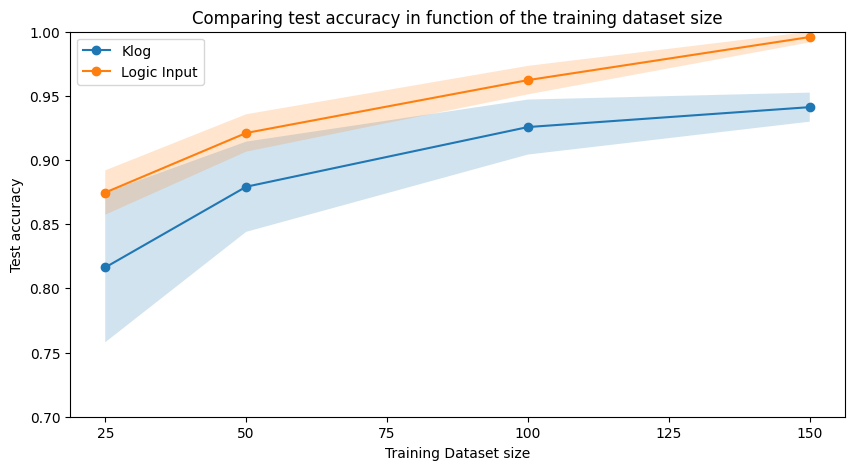

In [7]:
# get the average and std of the test accuracy for each model according to dataset size and plot it 
# for each model, plot the test accuracy according to the dataset size and the standard deviation

# get the average and std of the test accuracy for each model according to dataset size and plot it only model == "GlobalAttentionNet"
# don't use a bar plot but a line plot with datasize on the x axis and test accuracy on the y axis

# grouped_HotIn = HotIn_df[HotIn_df["model"] == "GIN"].groupby(["dataset_size"]).agg({"test_acc": ["mean", "std"]})
# # change dataset size 200 to 150
# grouped_HotIn.index = [25,50,100,150]

# grouped_KLog = HotKlog_df[HotKlog_df["model"] == "GIN"].groupby(["dataset_size"]).agg({"test_acc": ["mean", "std"]})

grouped_CorrectKLog = CorrectKlog_df[CorrectKlog_df["model"] == "GIN"].groupby(["dataset_size"]).agg({"test_acc": ["mean", "std"]})

bongard_df = pd.DataFrame({
    "dataset_size": [25,50,100,150],
    "mean" : [0.8747,0.9211,0.9623,0.995867768595041],
    "std": [0.01728,0.01458,0.0111,0.00412]
})
bongard_df.set_index("dataset_size", inplace=True)

# line plot with accuracy and std shaded, set the ticks to 25,50,100,150
# add small circle to the points

plt.figure(figsize=(10,5))
plt.plot(grouped_CorrectKLog["test_acc"]["mean"],'-o', label="Klog")
plt.fill_between(grouped_CorrectKLog.index, grouped_CorrectKLog["test_acc"]["mean"] - grouped_CorrectKLog["test_acc"]["std"], grouped_CorrectKLog["test_acc"]["mean"] + grouped_CorrectKLog["test_acc"]["std"], alpha=0.2)
plt.plot(bongard_df["mean"],'-o', label="Logic Input")
plt.fill_between(bongard_df.index, bongard_df["mean"] - bongard_df["std"], bongard_df["mean"] + bongard_df["std"], alpha=0.2)
plt.xlabel("Training Dataset size")
plt.ylabel("Test accuracy")
plt.legend()
plt.xticks([25,50,75,100,125,150])
plt.ylim(0.7,1)
# set title
plt.title("Comparing test accuracy in function of the training dataset size")
plt.show()


